# EDA on Titanic Dataset Understanding the data

### Libraries

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Understanding the data

In [2]:
df= pd.read_csv('Titanic-Dataset.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.70,C118,C
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.50,NaN,S
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.05,NaN,S
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.25,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.25,NaN,S


`df.smaple(n)` shows the random value from the dataset to get the overview about the dataset.

In [4]:
df.shape

(891, 12)

`df.shape` returns a tuple representing the number of rows and columns in the dataset. It gives you a quick overview of the dataset's dimensions, in the format (rows, columns).

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


`df.info()` provides a summary of the DataFrame, including the column names, the number of non-null values, and the data types of each column.

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


`df.describe()` generates summary statistics of the numerical columns in a DataFrame. It provides key metrics like the count, mean, standard deviation, minimum, and maximum values, along with the 25th, 50th (median), and 75th percentiles. This is useful for quickly understanding the distribution and spread of the data.

### Data Insights:
- The dataset contains **12 columns** and **891 rows**.
- There are **7 numerical columns**:
  - **2 columns** with `float64` data type.
  - **5 columns** with `int64` data type.
- There are **5 categorical (string/object) columns**.
- **Survival Rate**: About **38%** of passengers survived the Titanic disaster, as indicated by the mean of the `Survived` column.
- **Fare Distribution**: Fares vary significantly, with a few passengers paying much higher fares compared to the majority, suggesting a wide range in ticket prices.
- **Age**: The passengers’ ages range from infants to elderly individuals, with an average age of around **30 years**, indicating a relatively young population.


# Missing, Null and Duplicate Values

## Missing or Null Values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

`df.isnull().sum()` returns the total number of missing (null) values in each column of the DataFrame. It helps identify columns with missing data, allowing you to decide on appropriate data imputation or cleaning methods.

## Duplicate Values

In [10]:
df.duplicated().sum()

np.int64(0)

`df.duplicated().sum()` returns the total number of duplicate rows in the DataFrame. It checks for rows that are identical to a previous row, helping you identify and potentially remove duplicates from the dataset.


### Data Insights:
- **Missing Values**:
  - **Age**: 177 missing values
  - **Cabin**: 687 missing values
  - **Embarked**: 2 missing values
  - All other columns have no missing data.


- **Duplicate Values**: 
  - No duplicate rows in the dataset.


### `df.nuique()` : Give the unique values of the dataset

In [13]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Univarient Analysis

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

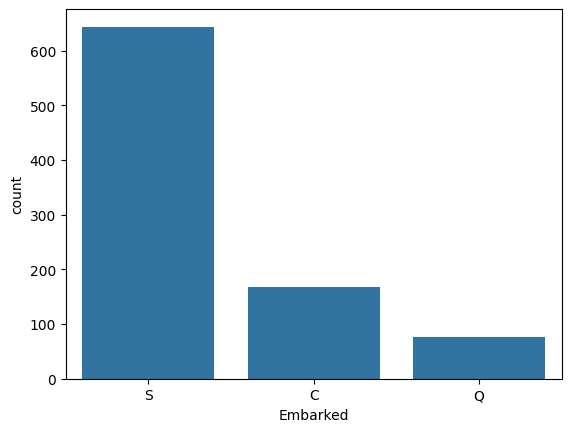

In [29]:
sns.countplot(x=df['Embarked'])
df['Embarked'].value_counts()

Insights: Most passengers departed from S. 

Survived
0    549
1    342
Name: count, dtype: int64

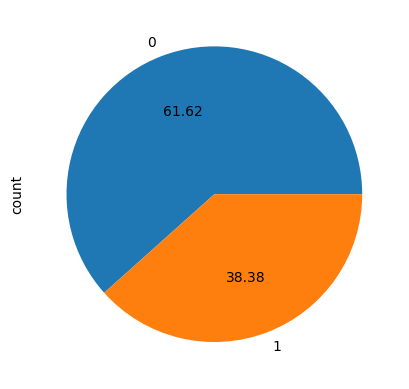

In [38]:
df['Survived'].value_counts().plot(kind='pie', autopct='%.2f')
df['Survived'].value_counts()

Insights:
 - 549 (61.62%) people didn't survived and 342 (38.98) people survived.

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

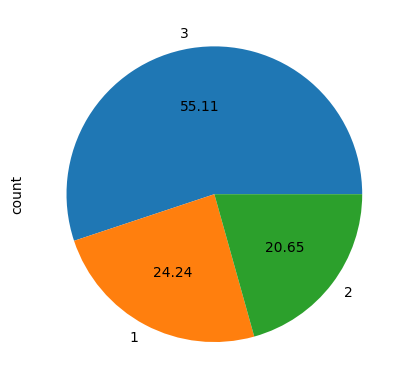

In [43]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%.2f')
df['Pclass'].value_counts()

Insights :
 -  Class 3 : 491 (55.11%) **Most** people travelling.
 -  Class 2 : 184 (20.65%) **Least** people where travelling.
 -  Class 1 : 216 (24.24%) people where travelling.

Sex
male      577
female    314
Name: count, dtype: int64

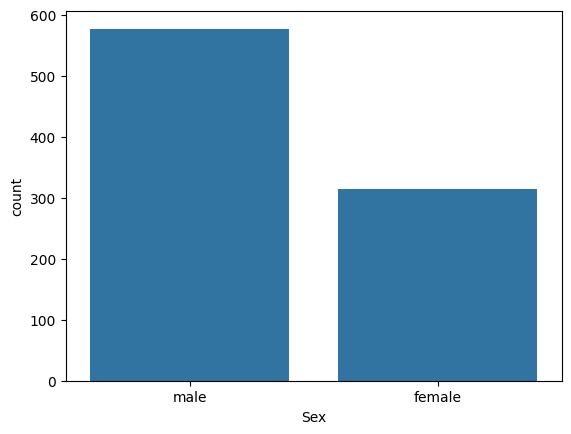

In [45]:
sns.countplot(x=df['Sex'])
df['Sex'].value_counts()

Insights :
 - 557 Males where travelling.
 - 314 Females where travelling.

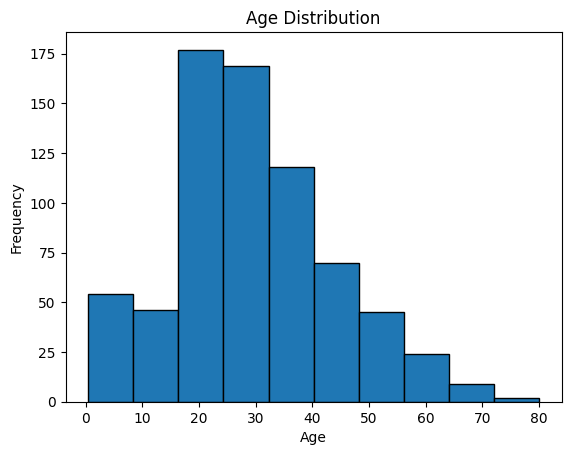

In [49]:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Data insghits : 
 - Adults where the mostly travelling. 

<Axes: ylabel='Fare'>

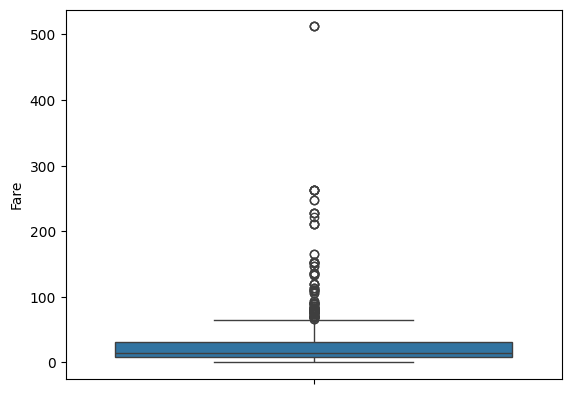

In [58]:
sns.boxplot(df['Fare'])

Insights:
 - The boxplot shows that most passengers paid lower fares, with several outliers paying much higher fares. The distribution is right-skewed.


`sns.boxplot()` is a visualization tool used to identify outliers in a dataset by showing the distribution of data, including the interquartile range (IQR). Outliers are typically defined as values that lie outside the range of 1.5 times the IQR above the upper quartile (Q3) or below the lower quartile (Q1)

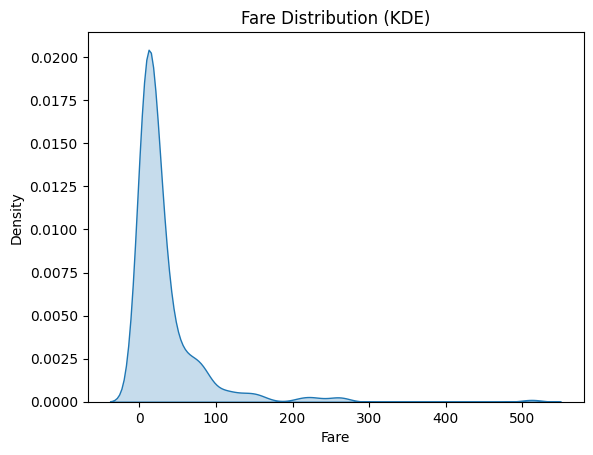

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Fare'] = df['Fare'].dropna()  #Drop the null values.

# KDE plot to visually inspect the distribution of 'Age'
sns.kdeplot(df['Fare'], fill=True)
plt.title('Fare Distribution (KDE)')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

Insights
- The KDE plot shows that most Titanic passengers paid low fares, with a few paying significantly higher fares. The distribution is right-skewed, indicating a concentration of low fares and a long tail for higher fares.


# Understanding KDE (Kernel Density Estimate) Plot

The **Kernel Density Estimate (KDE)** plot is a way to visualize the distribution of data in a smooth, continuous curve. It provides a **probability density function** (PDF) that helps you understand the underlying distribution of your data.

### What the KDE plot tells you:

1. **Shape of the Distribution**:
   - **Symmetry vs Skewness**: If the KDE curve is symmetrical, it suggests that your data is balanced on both sides. If it's skewed to the left or right, it indicates the data's asymmetry.
     - **Positive skew**: The curve has a tail on the right (longer right tail).
     - **Negative skew**: The curve has a tail on the left (longer left tail).
     - **Symmetric**: The curve is balanced on both sides, like a bell curve (normal distribution).

2. **Peaks (Modes)**:
   - The **peaks** in the KDE plot represent the most frequent values or clusters in your data (known as **modes**).
     - A **single peak** (unimodal) suggests a **single dominant value range**.
     - Multiple peaks (multimodal) suggest that your data may come from **multiple different distributions** or groups.

3. **Spread (Variance)**:
   - The **width** of the curve gives you an idea of how spread out the data is.
     - A **narrow** curve suggests that most values are clustered near the center, indicating low variance.
     - A **wide** curve indicates that the data is spread out, suggesting high variance.

4. **Outliers**:
   - The **tails** of the KDE curve indicate areas where outliers may be present.
   - If the tail is long in one direction, it may suggest that the data has extreme values or outliers in that direction.

5. **Density**:
   - The **height** of the curve indicates the **density** (frequency) of data points at a given value. Higher areas represent where data points are concentrated.

### Example:

Imagine a dataset representing people's ages:

- **Symmetric Distribution**: A symmetric KDE plot with a single peak suggests that most ages are clustered around a certain value (e.g., 30 years), with roughly equal numbers of people below and above that value.
- **Positively Skewed Distribution**: A right-skewed KDE curve with a long tail on the right might indicate that most people are younger, but there are some much older people in the data.
- **Negatively Skewed Distribution**: A left-skewed KDE curve with a long tail on the left could suggest that most people are older, but there are some much younger people in the data.

### Example KDE Plot Interpretation:

Let's say you have a dataset of ages:

- **If the KDE plot is normal** (bell-shaped), your data is roughly symmetrically distributed around a central value.
- **If the KDE plot has a long tail on the right** (positively skewed), it suggests that there are a few very large values (perhaps older ages).
- **If the KDE plot has a long tail on the left** (negatively skewed), it suggests that there are a few very small values (perhaps younger ages).
